# SL3 - Comparing classifiers

In this hands-on lesson, we will compare the performance of different algorithms for classification on the Iris data set.  

This notebook is adapted from https://medium.com/@pinnzonandres/iris-classification-with-svm-on-python-c1b6e833522c 

and https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset 

![title](Figures/IrisData.png)


Iris is a genus of 260–300 species of flowering plants with showy flowers. It takes its name from the greek word for a rainbow,Iris.

In the dataset we have three types of iris:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

For each flower we know (the features of our machine learning classifier):

- Sepal length
- Sepal width
- Petal length
- Petal width

The goal is to correctly classify the three types of iris using the four features

## Import relevant libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Load and preprocessing

### Load the data and inspect them

In [10]:
#Load dataset
iris = datasets.load_iris()

In [11]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)
# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
# print the iris data (top 5 records)
print(iris.data[0:5])
# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### EXERCISE: Transofm the data in a dataframe

In [13]:
# Transofm the data in a dataframe
# YOUR CODE HERE

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [105]:
# print the size of the data
print(df['target'].value_counts())

2    50
1    50
0    50
Name: target, dtype: int64


### EXERCISE: Examine how fatures correlate with the target

In [6]:
# Plot correlation 
fig, ax = plt.subplots(figsize=(6,5))
# YOUR CODE HERE


### QUESTION: which features are the most correlated with the type of flowers?

### EXERCISE: Try to visualize pair scatter plots 

This will be usefull to identify variables in which different targets eventually split into clusters.

Do it in two different ways:

- Manual visualialization with matplotlib
- Plot all the pair scatter with seaborn

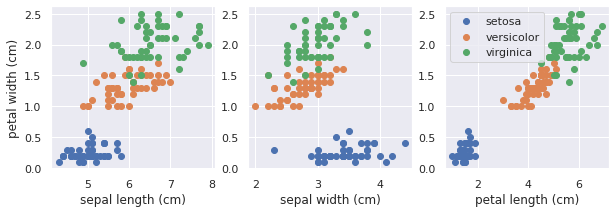

In [15]:
# Scatterplot of the features most correlated with flower type
# Create a subplot with 3 rows and one column with matplotlib
# In each of the three subplots, scatterplot the petal width VS the other features
# Color code according to the flower type
# You should obtain an output similat to the one below

targets = np.unique(df['target'].values)
ncols = 3 
fig, axs = plt.subplots(ncols=ncols, nrows=1, figsize=(10,3))
# YOUR CODE HERE





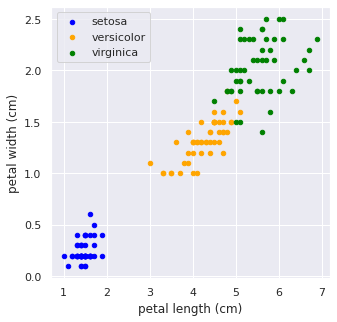

In [108]:
# Similar plot usinf the dataframe directly
colors = ['blue','orange','green']
fig, ax = plt.subplots(figsize=(10,10))
for i in range(len(iris.target_names)):
    label = iris.target_names[i]
    color = colors[i]
    df[df.target==i].plot.scatter(x='petal length (cm)', y='petal width (cm)', 
                                  label=label, color=color, ax=ax)


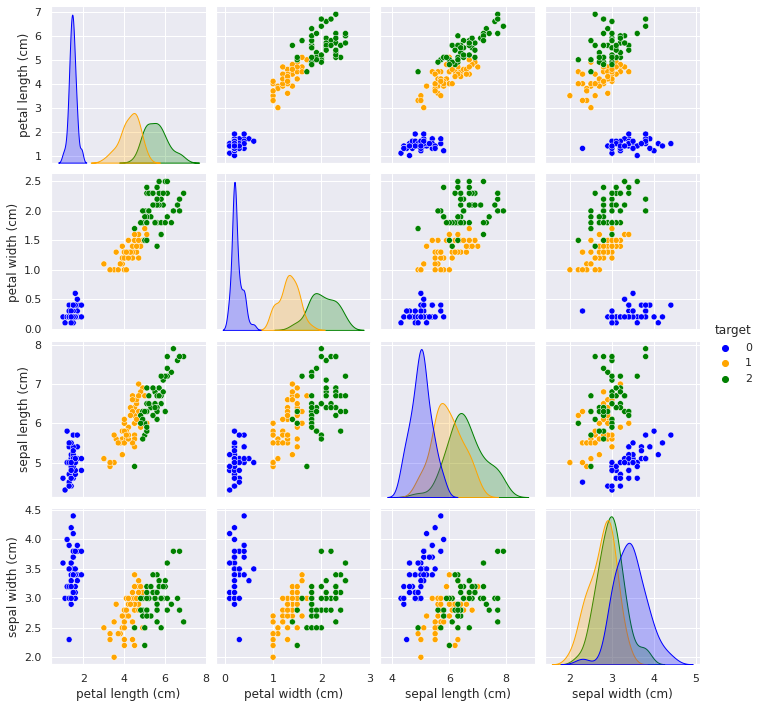

In [17]:
# Or even plotting something more insigthfull with seaborn
# YOUR CODE HERE





### QUESTION : which features are the most important to distinguish the type of flowers?

### EXERCISE:  Prepare the data to apply machine learning classification models

Define X (the features) and y (the targets), and split the data using `train_test_split(X, y, test_size=0.3)`

In [21]:
# YOUR CODE HERE


Below someline of code to check that you did it correctly 

In [22]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [112]:
X.iloc[:5,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
y[:5]

array([0, 0, 0, 0, 0])

## Classification with Random Forest

### EXERCISE Train the model and compute accuracy
- Define multiple `RandomForestClassifier` changing the depth of the trees. Use `n_estimators=100`
- Train each of the models and compute and save the accuracy for each classifier on the test set. 
- Plot the accuracy curve as a function of the depth

In [165]:
# YOUR CODE HERE


### Visualize the important features for the best of your classifiers

In [143]:
clf.feature_importances_

array([0.0725701 , 0.02057909, 0.50056255, 0.40628825])

In [144]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp


petal length (cm)    0.500563
petal width (cm)     0.406288
sepal length (cm)    0.072570
sepal width (cm)     0.020579
dtype: float64

In [145]:
feature_imp.index

Index(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

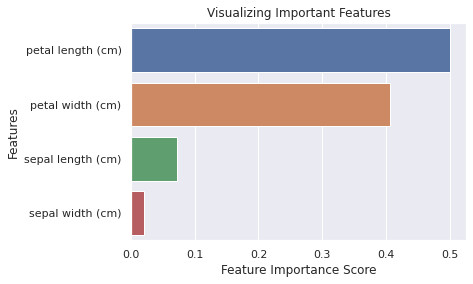

In [146]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index) 

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Classification with SVM

### EXERCISE: Now try to classify the same data using Support Vector Machine

To see how well the model perform, it can be useful to inspect :

- the `confusion_matrix` (see the import at the beginning of the notebook)
- the `cross_val_score`

In [167]:
#Create the SVM model and train it
classifier = SVC(kernel = 'linear', random_state = 0)
# YOUR CODE HERE





In [168]:
# Evaluate the confusion matrix and the accuracy
# YOUR CODE HERE




[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]
Accuracy: 98.00 %


In [169]:
y_test == y_pred

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [170]:
#Number of accurate predictions
sum(y_test == y_pred)
#Accuracy
print("Accuracy:",sum(y_test == y_pred)/len(y_test))

Accuracy: 0.9777777777777777


In [174]:
print("Accuracy sk learn:",metrics.accuracy_score(y_test, y_pred))

Accuracy sk learn: 0.9777777777777777


### EXERCISE:  Visualize the important features. 

You should obtain somenthing similar to the plot below

In [23]:
# Select features and index to do the plot next
# YOUR CODE HERE




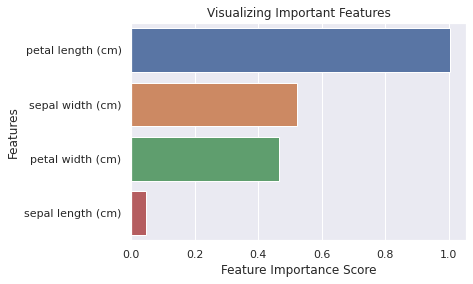

In [151]:
# Creating a better bar plot
# YOUR CODE HERE


# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### QUESTION: Why the SVC seems to classify better these data set?